In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import base64
import numpy as np
import seaborn as sns

from IPython.core.display import display, HTML
from sklearn.cluster import KMeans

In [2]:
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')

Text(0.5,0.98,'figure title')

<Figure size 432x288 with 0 Axes>

In [132]:
def cluster_impute(dataframe, variables):
    region_vals = dataframe.groupby(['region_clusters'])[variables].mean()
    for i in range(0, len(np.unique(dataframe['region_clusters']))):
        dataframe.loc[dataframe.region_clusters == i, variables] = int(region_vals[i])

### Cleaning Steps Taken:
#### Removal of rows with longitude value of 0
#### Imputation of population, construction_year, and gps_height based on the variable's cluster mean
#### Imputation of boolean variables permit and public_meeting, NaN values were set to False
#### Created year and month standalone columns

### Import Datasets

In [133]:
train_data = pd.read_csv('data/training_values.csv', header=0, sep=',')
test_data = pd.read_csv('data/test_values.csv', header=0, sep=',')

In [4]:
sys.path.insert(0, 'facets/facets_overview/python/')
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': train_data},
                                 {'name': 'test', 'table': test_data}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [5]:
HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

#### Add region clusters for imputation

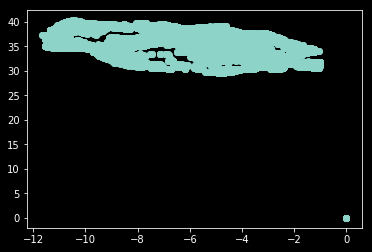

In [134]:
plt.scatter(train_data['latitude'], train_data['longitude'])
plt.show()

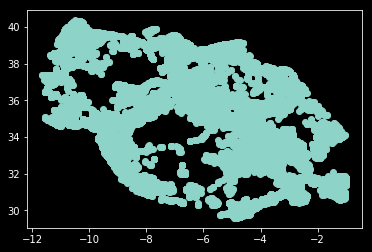

In [135]:
lat_lon_dataframe = train_data[['latitude', 'longitude']].copy()
lat_lon_dataframe = lat_lon_dataframe[lat_lon_dataframe.ne(0).all(axis=1)]
plt.scatter(lat_lon_dataframe['latitude'], lat_lon_dataframe['longitude'])
plt.show()

In [136]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(lat_lon_dataframe)
cluster_labels = kmeans_model.predict(lat_lon_dataframe)
lat_lon_dataframe['cluster_values'] = cluster_labels

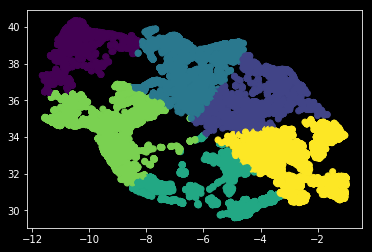

In [137]:
plt.scatter(lat_lon_dataframe['latitude'], lat_lon_dataframe['longitude'], c=lat_lon_dataframe['cluster_values'])
plt.show()

#### Remove the 0 longitude rows from the training data and add the clusters

In [138]:
train_data = train_data[(train_data[['longitude']] != 0).all(axis=1)]
train_data['region_clusters'] = cluster_labels

#### Impute population, construction_year, and gps_height

In [140]:
train_data.astype(bool).sum(axis=0)

id                       57587
amount_tsh               17761
date_recorded            57588
funder                   57588
gps_height               38962
installer                57588
longitude                57588
latitude                 57588
wpt_name                 57588
num_private                757
basin                    57588
subvillage               57588
region                   57588
region_code              57588
district_code            57565
lga                      57588
ward                     57588
population               38019
public_meeting           52713
recorded_by              57588
scheme_management        57588
scheme_name              57588
permit                   41156
construction_year        38691
extraction_type          57588
extraction_type_group    57588
extraction_type_class    57588
management               57588
management_group         57588
payment                  57588
payment_type             57588
water_quality            57588
quality_

In [141]:
cluster_impute(train_data, 'population')
cluster_impute(train_data, 'construction_year')
cluster_impute(train_data, 'gps_height')

In [142]:
train_data.astype(bool).sum(axis=0)

id                       57587
amount_tsh               17761
date_recorded            57588
funder                   57588
gps_height               57588
installer                57588
longitude                57588
latitude                 57588
wpt_name                 57588
num_private                757
basin                    57588
subvillage               57588
region                   57588
region_code              57588
district_code            57565
lga                      57588
ward                     57588
population               57588
public_meeting           52713
recorded_by              57588
scheme_management        57588
scheme_name              57588
permit                   41156
construction_year        57588
extraction_type          57588
extraction_type_group    57588
extraction_type_class    57588
management               57588
management_group         57588
payment                  57588
payment_type             57588
water_quality            57588
quality_

#### Date formatting

In [143]:
train_data['date_recorded'] = pd.to_datetime(train_data['date_recorded'])

In [144]:
print(train_data['date_recorded'].head())

0   2011-03-14
1   2013-03-06
2   2013-02-25
3   2013-01-28
4   2011-07-13
Name: date_recorded, dtype: datetime64[ns]


In [148]:
train_data['year'], train_data['month'] = train_data['date_recorded'].dt.year, train_data['date_recorded'].dt.month

In [147]:
print(train_data['year'].head())

0    2011
1    2013
2    2013
3    2013
4    2011
Name: year, dtype: int64


In [149]:
print(train_data['month'].head())

0    3
1    3
2    2
3    1
4    7
Name: month, dtype: int64


#### Impute True/False Variables (permit and public_meeting)

In [154]:
print(sum(pd.isna(train_data.permit)))
print(sum(pd.isna(train_data.public_meeting)))

3056


In [158]:
train_data['permit'] = train_data['permit'].fillna(False)
train_data['public_meeting'] = train_data['public_meeting'].fillna(False)

In [159]:
print(sum(pd.isna(train_data.permit)))
print(sum(pd.isna(train_data.public_meeting)))

0
0


#### Summarize low frequency categorical variables

In [165]:
series = pd.value_counts(train_data.subvillage)
print((series/series.sum() * 100).lt(.1))

Majengo                 False
Shuleni                 False
Madukani                False
Kati                    False
Mtakuja                 False
Sokoni                  False
M                       False
Muungano                False
Mbuyuni                 False
Mlimani                 False
Songambele              False
Miembeni                False
Msikitini               False
1                       False
Kibaoni                 False
Kanisani                False
I                       False
Mapinduzi               False
Mjimwema                False
Mjini                   False
Mkwajuni                False
Mwenge                  False
Azimio                  False
Mabatini                False
Bwawani                 False
Mission                 False
Chang'Ombe              False
Bondeni                 False
Senta                   False
Mtaa Wa Kitunda Kati    False
                        ...  
Namsingili               True
Teka                     True
Mlengasemo

In [166]:
train_data.to_csv("data/cleaned_dataframe.csv", sep=",", header=True)